# Lecture 06: Basis Expansion

Imports and Helper Functions
---

<IPython.core.display.Javascript object>


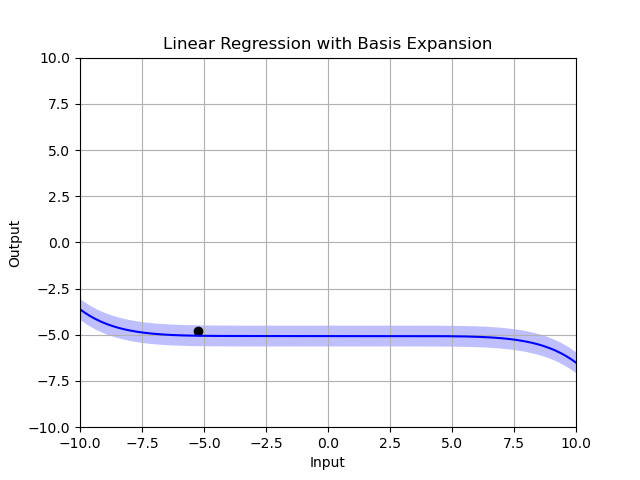

LinAlgError: Singular matrix

LinAlgError: Singular matrix

LinAlgError: Singular matrix

LinAlgError: Singular matrix

LinAlgError: Singular matrix

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.colors import ListedColormap
from subprocess import call
from sklearn import linear_model
from sklearn import svm
import ipywidgets as widgets
from IPython.display import display

import sys
sys.stdout = open('/dev/stdout', 'w')

import warnings
warnings.filterwarnings('ignore')

%matplotlib notebook


def data_selector():
    """Define an interactive classifier. clf can be any classifier
    object that implements predict. fig must be a figure handle
    to a 2d data plot created using plot2d_data(). The function
    applies the classifier to the points that you click on and
    plots them in the specified figure.
    """
    #Define the event handler
    def onclick(event):
        global N
        global x_tr
        global y_tr

        x_tr[N]=event.xdata
        y_tr[N]=event.ydata
        N=N+1
               
        plot_data(x_tr[:N],y_tr[:N])
        learn_model()
        plot_model()
    
    #Create a callback to connect the handler to mouse click events 
    cid = fig.canvas.mpl_connect('button_press_event', onclick)

def plot_data(x,y):
    """Plot a 2d data set. x must be an (N,) array of feature values. 
    y must be an (N,) array of output values."""
    global data_points
    
    if data_points is not None:
        plt.gca().lines.remove(data_points[0])
    
    if(x.size>0):
        data_points = plt.plot(x,y,"ko")
    else:
        data_points = None
        
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.xlim(-10,10)
    plt.ylim(-10,10)
    plt.grid(True)
    plt.title("Linear Regression with Basis Expansion")
    
def plot_model():
    global theta
    global sigma
    global model_lines
    global degree

    global xs
    global ys
    
    xs = np.linspace(-10,10,200)
    d = np.linspace(0,degree,1+degree).reshape([1,1+degree])
    X=(xs.reshape([xs.size,1]))**d
    ys = X.dot(theta).squeeze()
    std2 = 2*sigma*np.ones(ys.shape)
    
    #Remove the function line
    try:
        if model_lines[0] is not None:
            plt.gca().lines.remove(model_lines[0][0])
            model_lines[0]=None

        if model_lines[1] is not None:
            plt.gca().collections.remove(model_lines[1])
            model_lines[1]=None
    except:
        model_lines[0]=None
        model_lines[1]=None
        
    model_lines[0]=plt.plot(xs,ys,'-b')
    model_lines[1]=plt.fill_between(xs, ys-std2, ys+std2, facecolor='blue', alpha=0.25)
    

wlambda = widgets.FloatSlider(
    value=-10,
    min=-10,
    max=10.0,
    step=1,
    description='log $\lambda$:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)


wdegree = widgets.FloatSlider(
    value=1,
    min=0,
    max=20.0,
    step=1,
    description='degree:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)


wreset = widgets.Button(description="Reset")
wlearn = widgets.Button(description="Learn")

items1 = [wdegree, wlearn]
items2 = [wlambda, wreset]

whbox1 = widgets.HBox(items1)
whbox2 = widgets.HBox(items2)
wvbox  = widgets.VBox([whbox1,whbox2])

def on_lambda_change(change):
    global lam
    lam = 10**change.new
    learn_model()
    plot_model()
    
wlambda.observe(on_lambda_change, names='value')

def on_degree_change(change):
    global degree
    degree = int(change.new)
    learn_model()
    plot_model()
    
wdegree.observe(on_degree_change, names='value')

def learn_model():
    global x_tr
    global y_tr
    global lam    
    global degree
    global theta
    global sigma
    
    d = np.linspace(0,degree,1+degree).reshape([1,1+degree])
    X=(x_tr[:N].reshape([N,1]))**d
    Y = np.zeros((N,1))
    Y[:,0]=y_tr[:N]

    reg = lam*np.eye(degree+1)
    reg[0,0]=0
    
    theta  = np.linalg.inv(X.T.dot(X)+reg).dot(X.T).dot(Y)
    sigma  = np.sqrt(np.mean((Y-X.dot(theta))**2))

    
def on_wlearn_clicked(b): 
    learn_model()
    plot_model()
    
wlearn.on_click(on_wlearn_clicked)

def on_reset_clicked(b):
    init_demo()
    plot_model()
    
wreset.on_click(on_reset_clicked)

def init_demo():
    global N
    global x_tr
    global y_tr
    
    global lam 
    global lines
    global degree
    global theta
    global sigma
        
    global wlambda
    global wdegree
    
    global model_lines
    global data_points

    lam=10**-10
    degree=1
    model_lines=[None,None]
    data_points=None
    
    wlambda.value=np.log10(lam)
    wdegree.value=degree
    theta = np.array([[0],[0]])
    sigma = 1
    
    N=0
    x_tr = np.zeros(100)
    y_tr = np.zeros(100)
    plt.clf()
    plot_data(x_tr[:N],y_tr[:N])
    plot_model()
    
fig = plt.figure()
init_demo()
data_selector()
display(wvbox)
